In [60]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt

In [22]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [56]:
# Convert categorical data to numeric and separate target feature for training data
y_train = train_df['target']
y_train_label = LabelEncoder().fit_transform(y_train)
train_dummies_data = pd.get_dummies(train_df.drop(['target'], axis = 1))
print(train_dummies_data.columns)
train_dummies_data.head()

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_in

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,7000.0,0.1894,256.38,75000.0,28.62,0.0,2.0,20.0,0.0,40414.0,...,0,1,1,0,1,0,1,0,1,0
1,40000.0,0.1614,975.71,102000.0,11.72,2.0,0.0,10.0,0.0,43531.0,...,0,1,0,1,1,0,1,0,1,0
2,11000.0,0.2055,294.81,45000.0,37.25,1.0,3.0,23.0,0.0,8242.0,...,1,1,0,1,1,0,1,0,1,0
3,4000.0,0.1612,140.87,38000.0,42.89,1.0,0.0,7.0,0.0,12767.0,...,0,1,0,1,0,1,1,0,1,0
4,14000.0,0.1797,505.93,43000.0,22.16,1.0,0.0,22.0,0.0,11182.0,...,0,1,0,1,1,0,1,0,1,0


In [25]:
# Convert categorical data to numeric and separate target feature for testing data
y_test = test_df['target']
y_test_label = LabelEncoder().fit_transform(y_test)
print(y_test_label)
test_dummies_data = pd.get_dummies(test_df.drop(['target'], axis = 1))
print(test_dummies_data.columns)


[1 1 1 ... 0 0 0]
Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mt

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N
0,40000.0,0.1033,856.40,128700.0,12.47,0.0,1.0,8.0,0.0,38113.0,...,1,0,1,0,1,1,0,0,1,1
1,24450.0,0.1430,572.72,44574.0,15.05,0.0,1.0,6.0,0.0,1665.0,...,0,0,1,0,1,1,0,1,0,1
2,13500.0,0.1430,316.23,60000.0,28.72,0.0,0.0,8.0,0.0,13857.0,...,0,0,1,0,1,1,0,0,1,1
3,10625.0,0.1774,268.31,60000.0,15.70,0.0,4.0,17.0,0.0,6216.0,...,0,1,1,0,1,1,0,1,0,1
4,6375.0,0.1862,232.46,60000.0,35.50,0.0,0.0,13.0,0.0,12681.0,...,1,0,1,0,1,1,0,1,0,1


In [30]:
# add missing dummy variables to testing set
test_dummies_data['debt_settlement_flag_Y'] = 0
test_dummies_data.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,40000.0,0.1033,856.40,128700.0,12.47,0.0,1.0,8.0,0.0,38113.0,...,0,1,0,1,1,0,0,1,1,0
1,24450.0,0.1430,572.72,44574.0,15.05,0.0,1.0,6.0,0.0,1665.0,...,0,1,0,1,1,0,1,0,1,0
2,13500.0,0.1430,316.23,60000.0,28.72,0.0,0.0,8.0,0.0,13857.0,...,0,1,0,1,1,0,0,1,1,0
3,10625.0,0.1774,268.31,60000.0,15.70,0.0,4.0,17.0,0.0,6216.0,...,1,1,0,1,1,0,1,0,1,0
4,6375.0,0.1862,232.46,60000.0,35.50,0.0,0.0,13.0,0.0,12681.0,...,0,1,0,1,1,0,1,0,1,0


# Before you create, fit, and score the models, make a prediction as to which model you think will perform better.



I think the random forest will perform better because i think it will be able to better drill down which features are more predictive out of the large number of features. It will be able to ignore the "noise" variables better.  

In [57]:
# Train the Logistic Regression model on the unscaled data and print the model score

classifier = LogisticRegression()
classifier.fit(train_dummies_data, y_train_label)
print(f"Training Data Score: {classifier.score(train_dummies_data, y_train_label)}")
print(f'Testing Score: {classifier.score(test_dummies_data, y_test_label )}')

Training Data Score: 0.6541050903119868
Testing Score: 0.5082943428328371


C:\Users\dmtib\anaconda3\envs\Python_Requirements_Windows\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [58]:
# Train a Random Forest Classifier model and print the model score
classifier = RandomForestClassifier(random_state=1, n_estimators=500).fit(train_dummies_data, y_train_label)
print(f"Training Data Score: {classifier.score(train_dummies_data, y_train_label)}")
print(f'Testing Score: {classifier.score(test_dummies_data, y_test_label )}')

Training Data Score: 1.0
Testing Score: 0.646958740961293


# The data going into these models was never scaled, an important step in preprocessing. Use StandardScaler to scale the training and testing sets. Before re-fitting the LogisticRegression and RandomForestClassifier models on the scaled data, make another prediction about how you think scaling will affect the accuracy of the models. Write your predictions down and provide justification.

I think scaling the data will help th models perform better as several of the features on are on much larger or smaller scales which would affect the weighting of those features more during the training process

In [41]:
# Scale the data
scaler = StandardScaler().fit(train_dummies_data)
X_train_scaled = scaler.transform(train_dummies_data)
X_test_scaled = scaler.transform(test_dummies_data)

In [67]:
# Train the Logistic Regression model on the scaled data and print the model score
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train_label)
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train_label)}")
print(f'Testing Score: {classifier.score(X_test_scaled, y_test_label)}')

Training Data Score: 0.710919540229885
Testing Score: 0.7598894087622289


C:\Users\dmtib\anaconda3\envs\Python_Requirements_Windows\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [70]:
y_pred = classifier.predict(X_test_scaled)
print(confusion_matrix(y_test_label, y_pred))
print(classification_report(y_test_label, y_pred))

[[1764  587]
 [ 542 1809]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.76      2351
           1       0.76      0.77      0.76      2351

    accuracy                           0.76      4702
   macro avg       0.76      0.76      0.76      4702
weighted avg       0.76      0.76      0.76      4702



In [73]:
# Train a Random Forest Classifier model on the scaled data and print the model score
Rclassifier = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f"Training Data Score: {Rclassifier.score(X_train_scaled, y_train)}")
print(f'Testing Score: {Rclassifier.score(X_test_scaled, y_test)}')

Training Data Score: 1.0
Testing Score: 0.6480221182475542


In [72]:
y_pred = Rclassifier.predict(X_test_scaled)
print(confusion_matrix(y_test_label, y_pred))
print(classification_report(y_test_label, y_pred))

NameError: name 'Rclassifier' is not defined

[1.64175246e-02 3.36047005e-02 3.07032294e-02 1.42239163e-02
 1.54887781e-02 2.97922850e-03 4.27051795e-03 8.55840612e-03
 1.33532005e-03 1.51577257e-02 1.16142472e-02 2.95307776e-02
 2.99764667e-02 4.53332754e-02 4.48443196e-02 5.25173382e-02
 4.98329797e-02 1.62671260e-02 0.00000000e+00 0.00000000e+00
 9.97444637e-02 6.56760511e-04 0.00000000e+00 0.00000000e+00
 4.27868968e-03 1.34563223e-02 4.63160385e-03 6.58760719e-03
 4.03294385e-03 6.17692505e-03 1.18528253e-02 1.31099214e-02
 1.40812113e-02 5.12304140e-03 7.78349300e-03 1.53878110e-02
 1.33159958e-02 1.54529099e-02 5.98482161e-03 6.83047428e-03
 7.85674268e-03 9.78167759e-03 1.39355711e-02 1.55873811e-02
 1.40840046e-02 2.93482835e-04 0.00000000e+00 1.54613564e-02
 1.62359542e-02 1.18244670e-02 1.00680524e-02 5.67200574e-03
 1.29851695e-02 1.18672718e-02 3.62464457e-03 7.08920963e-03
 7.86624182e-03 7.36513040e-03 8.69878830e-03 1.01283162e-02
 8.34738211e-03 9.97869361e-03 7.97169822e-03 8.66230546e-03
 0.00000000e+00 0.000000

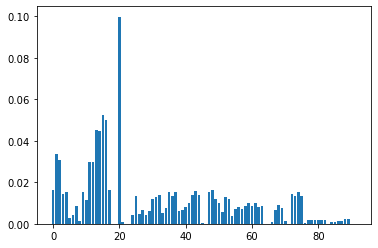

In [48]:
features = classifier.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

# How do the model scores compare to each other, and to the previous results on unscaled data? How does this compare to your prediction? Write down your results and thoughts.

Scaling the data helped the regression model perform better, but did not affect the accuracy of the Random Forest classifier. After scaling the data the logistic regression classifier seems to outperform the random forest classifier. As seen in the feature importance, there does not seem to be many individually highly predictive features in the dataset according to the random forest. Contrary to prediction, The logistic regression appears to be doing a better job weighting the varous features to predict the outcome. 